In [1]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 2.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
series=pd.read_excel("/content/sapphire.xlsx")

In [4]:
series.head()

,event_time,price_sap
0,2020-10-26,214.10
1,2020-12-17,415.54
2,2020-12-17,415.54
3,2021-02-18,415.54
4,2021-02-18,415.54


In [5]:
series["event_time"]=pd.to_datetime(series["event_time"])

In [6]:
new_series=series.groupby("event_time").sum()

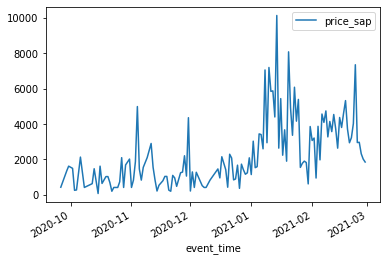

In [7]:
new_series.plot()

In [8]:
new_series.isnull().sum()

price_sap    0
dtype: int64

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adfuller_test(purchase):
    result=adfuller(purchase)
    labels = ['ADF Test Statistic','p-value']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adfuller_test(new_series["price_sap"])

ADF Test Statistic : -1.907258935457423
p-value : 0.3286540217756968
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
sapp_diff=new_series["price_sap"].diff()

In [13]:
sapp_diff=sapp_diff.dropna()

In [14]:
adfuller_test(sapp_diff)

ADF Test Statistic : -7.591735707413118
p-value : 2.5208927113564864e-11
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [15]:
sapp_diff.shape

(132,)

In [16]:
sapp_diff.tail()

event_time
2021-02-24   -4394.41
2021-02-25      13.61
2021-02-26    -648.56
2021-02-27    -300.15
2021-02-28    -166.59
Name: price_sap, dtype: float64

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


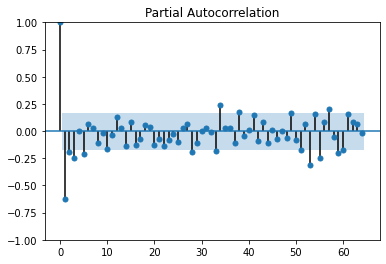

In [18]:
pacf_plot = plot_pacf(sapp_diff,lags=64)


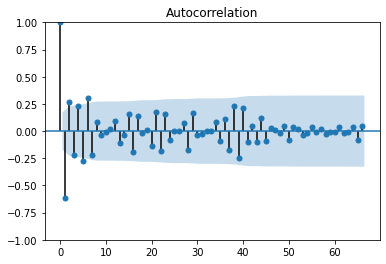

In [19]:
acf_plot = plot_acf(sapp_diff, lags = 66)

In [20]:
import statsmodels.api as sm


In [21]:
model1 = sm.tsa.arima.ARIMA(new_series, order=(0,1,2))
result1 = model1.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [22]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              price_sap   No. Observations:                  133
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1143.307
Date:                Thu, 12 May 2022   AIC                           2292.614
Time:                        08:24:54   BIC                           2301.263
Sample:                             0   HQIC                          2296.129
                                - 133                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8016      0.077    -10.355      0.000      -0.953      -0.650
ma.L2          0.1499      0.076      1.971      0.049       0.001       0.299
sigma2      1.948e+06   1.81e+05     10.764      0.000    1.59e+06     2.3e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                30.40
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               3.00   Skew:                             0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
forecast_1=result1.predict(start=107,end=132,dynamic=True)


In [24]:
forecast_1

event_time
2021-02-03    2802.770907
2021-02-04    2909.085471
2021-02-05    2909.085471
2021-02-06    2909.085471
2021-02-07    2909.085471
2021-02-08    2909.085471
2021-02-09    2909.085471
2021-02-10    2909.085471
2021-02-11    2909.085471
2021-02-12    2909.085471
2021-02-13    2909.085471
2021-02-14    2909.085471
2021-02-15    2909.085471
2021-02-16    2909.085471
2021-02-17    2909.085471
2021-02-18    2909.085471
2021-02-19    2909.085471
2021-02-20    2909.085471
2021-02-21    2909.085471
2021-02-22    2909.085471
2021-02-23    2909.085471
2021-02-24    2909.085471
2021-02-25    2909.085471
2021-02-26    2909.085471
2021-02-27    2909.085471
2021-02-28    2909.085471
Name: predicted_mean, dtype: float64

In [25]:
sapp_diff.index=range(0,132)

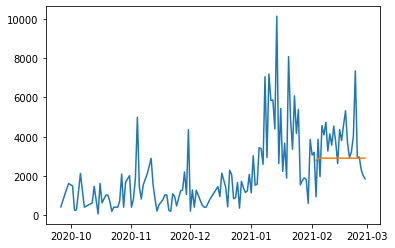

In [26]:
plt.plot(new_series)
plt.plot(forecast_1)
plt.show()

In [55]:
model2=sm.tsa.statespace.SARIMAX(new_series,order=(0, 1, 2),seasonal_order=(0,1,2,31))
results2=model2.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


In [56]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          price_sap   No. Observations:                  133
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 31)   Log Likelihood                -890.411
Date:                            Thu, 12 May 2022   AIC                           1790.822
Time:                                    08:28:42   BIC                           1803.898
Sample:                                         0   HQIC                          1796.116
                                            - 133                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8442      0.092     -9.134      0.000      -1.025      -0.663
ma.L2          0.1179      0.089      1.319      0.187      -0.057       0.293
ma.S.L31      -0.9477      0.475     -1.996      0.046      -1.878      -0.017
ma.S.L62       0.1648      0.273      0.603      0.546      -0.371       0.700
sigma2      2.267e+06   1.09e+06      2.078      0.038    1.29e+05    4.41e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                19.37
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               2.75   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
forecast_2=results2.predict(start=101,end=131,dynamic=True)


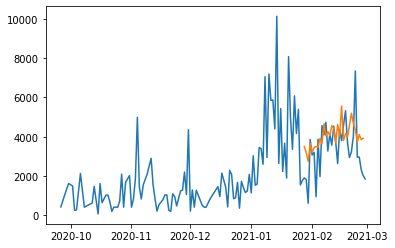

In [66]:
plt.plot(new_series)
plt.plot(forecast_2)
plt.show()

In [67]:
y=new_series.price_sap[101:132]

In [68]:
y

event_time
2021-01-28    1902.87
2021-01-29    1824.17
2021-01-30     615.89
2021-01-31    3857.39
2021-02-01    3068.71
2021-02-02    3207.74
2021-02-03     947.76
2021-02-04    3869.40
2021-02-05    1974.22
2021-02-06    4563.43
2021-02-07    4091.35
2021-02-08    4738.26
2021-02-09    3271.80
2021-02-10    4143.21
2021-02-11    3570.54
2021-02-12    4536.82
2021-02-13    3726.79
2021-02-14    2635.24
2021-02-15    4368.36
2021-02-16    3803.16
2021-02-17    4603.45
2021-02-18    5321.68
2021-02-19    3717.70
2021-02-20    2940.70
2021-02-21    3227.08
2021-02-22    4027.46
2021-02-23    7347.77
2021-02-24    2953.36
2021-02-25    2966.97
2021-02-26    2318.41
2021-02-27    2018.26
Name: price_sap, dtype: float64

In [69]:
residuals=forecast_2-y

In [70]:
forecast_2

event_time
2021-01-28    3500.163829
2021-01-29    3184.303480
2021-01-30    2744.406529
2021-01-31    3667.505282
2021-02-01    3202.973796
2021-02-02    3449.251674
2021-02-03    3508.974462
2021-02-04    3454.419278
2021-02-05    3909.216782
2021-02-06    3646.513592
2021-02-07    4660.777879
2021-02-08    4049.669401
2021-02-09    4262.271781
2021-02-10    4060.415645
2021-02-11    4567.199139
2021-02-12    4417.411856
2021-02-13    3674.901402
2021-02-14    4617.478163
2021-02-15    4024.643753
2021-02-16    5571.592507
2021-02-17    3810.393166
2021-02-18    4153.444614
2021-02-19    3997.596111
2021-02-20    4566.247084
2021-02-21    5195.865047
2021-02-22    4678.478419
2021-02-23    4350.523081
2021-02-24    3716.230196
2021-02-25    4112.619955
2021-02-26    3850.567001
2021-02-27    3922.338731
Name: predicted_mean, dtype: float64

In [71]:
residuals

event_time
2021-01-28    1597.293829
2021-01-29    1360.133480
2021-01-30    2128.516529
2021-01-31    -189.884718
2021-02-01     134.263796
2021-02-02     241.511674
2021-02-03    2561.214462
2021-02-04    -414.980722
2021-02-05    1934.996782
2021-02-06    -916.916408
2021-02-07     569.427879
2021-02-08    -688.590599
2021-02-09     990.471781
2021-02-10     -82.794355
2021-02-11     996.659139
2021-02-12    -119.408144
2021-02-13     -51.888598
2021-02-14    1982.238163
2021-02-15    -343.716247
2021-02-16    1768.432507
2021-02-17    -793.056834
2021-02-18   -1168.235386
2021-02-19     279.896111
2021-02-20    1625.547084
2021-02-21    1968.785047
2021-02-22     651.018419
2021-02-23   -2997.246919
2021-02-24     762.870196
2021-02-25    1145.649955
2021-02-26    1532.157001
2021-02-27    1904.078731
dtype: float64

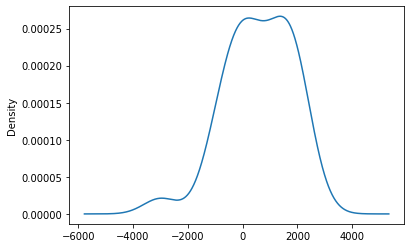

In [72]:
residuals.plot(kind='kde')
plt.show()

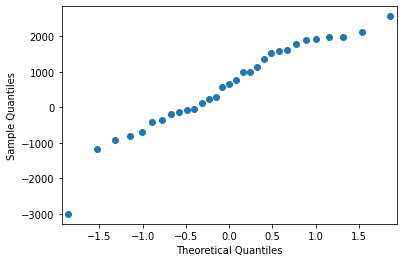

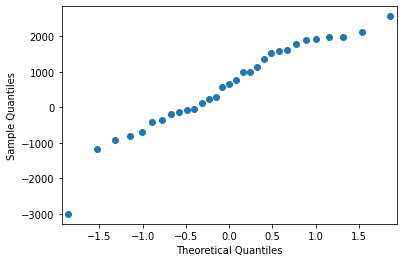

In [73]:
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals)

In [74]:
RSS=sum(residuals**2)

In [75]:
TSS=sapp_diff-sapp_diff.mean()

In [76]:
TSS_Squared=sum(TSS**2)

In [77]:
r_squared= 1-(RSS/TSS_Squared)

In [78]:
r_squared

0.8735914574039756

In [79]:
from scipy.stats import shapiro

In [80]:
shapiro(residuals)

(0.9509591460227966, 0.1659122258424759)